In [30]:
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt
from models.vanilla_vae import *
from models.vanilla_vae_fashionMnist import *
from models.vanilla_vae_anime_faces import *
from models.info_vae_mnist import *
from models.info_vae_mnist_fashionMnist import *
from models.info_vae_mnist_anime_faces import *

In [33]:
with open(f"./config/info_vae_fashionMnist.yaml", 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

if torch.has_cuda:
    device = 'cuda'
else:
    device = 'cpu'

model = InfoVAE_FM(**config)
model.load_state_dict(torch.load("./ckpts/info_vae_fashionMnist.ckpt"))
model.to(device);

In [34]:
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = torchvision.transforms.functional.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [37]:
model.eval()

testset = torchvision.datasets.FashionMNIST(root='./datasets/fashion_mnist/', train=False, transform=transforms.ToTensor())
""" testset = torchvision.datasets.ImageFolder(root="./datasets/anime_faces/",
                                                           transform=transforms.Compose([
                                                               transforms.Resize(
                                                                   64),
                                                               transforms.CenterCrop(
                                                                   64),
                                                               transforms.ToTensor(),
                                                           ])); """

' testset = torchvision.datasets.ImageFolder(root="./datasets/anime_faces/",\n                                                           transform=transforms.Compose([\n                                                               transforms.Resize(\n                                                                   64),\n                                                               transforms.CenterCrop(\n                                                                   64),\n                                                               transforms.ToTensor(),\n                                                           ])); '

In [24]:
def show_comparison():
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=8, drop_last=True, shuffle=True, num_workers=8)
    with torch.no_grad():
        for batch_idx, (x, _) in enumerate(testloader):
            x = x.to('cuda')
            
            x_hat = model.forward(x)[0]
            x_orig = x
            break
    show(list(x_hat))
    show(list(x_orig))
    pass

In [10]:
def calculate_mean_std():
    zs = []
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=16, drop_last=True, shuffle=True, num_workers=8)
    with torch.no_grad():
        for batch_idx, (x, _) in enumerate(tqdm(testloader)):
            x = x.to(device)
            zs.append(model.forward(x)[4])
            if len(zs) > 1000:
                break
    zs = torch.vstack(zs)
    mean = torch.mean(zs, dim=0)
    var = torch.var(zs, dim=0)

    return mean, var

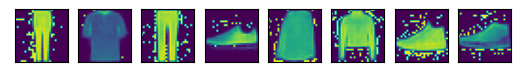

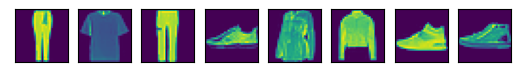

In [38]:
show_comparison()

In [39]:
mean, var = calculate_mean_std()

100%|██████████| 625/625 [00:01<00:00, 367.32it/s]


In [40]:
mean.mean()

tensor(-0.0025, device='cuda:0')

In [41]:
var.mean()

tensor(1.0109, device='cuda:0')